In [89]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [90]:
# Setting up the directory 
os.chdir('E:\\Python\\Projects\\Sumit\\churn')

In [91]:
# Loading the train data
data = pd.read_csv('Train_data.csv' , sep=',')

In [92]:
# Checking first 5 rows of train data
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [93]:
# Getting the strucutre of train data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [94]:
#Check missing values
data.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

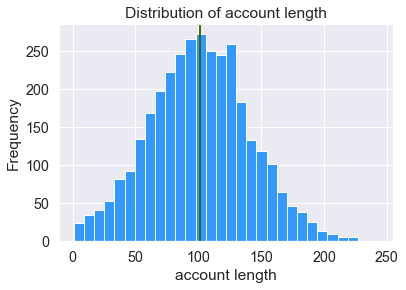

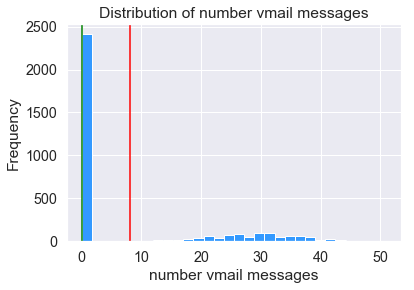

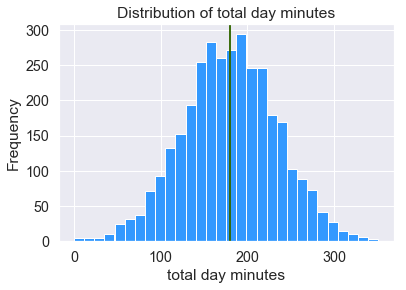

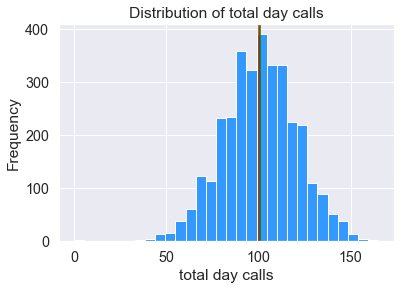

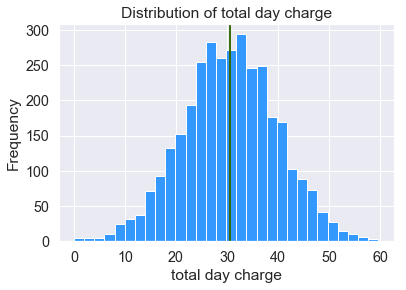

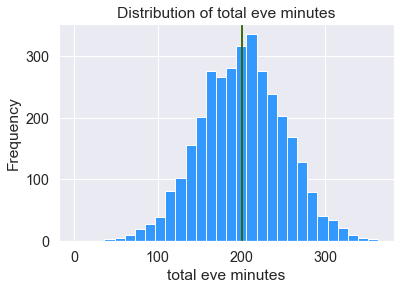

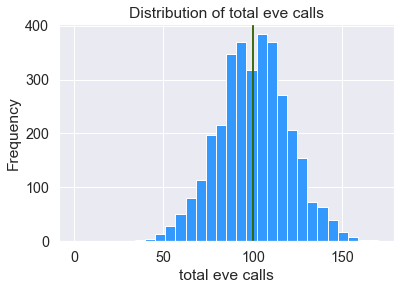

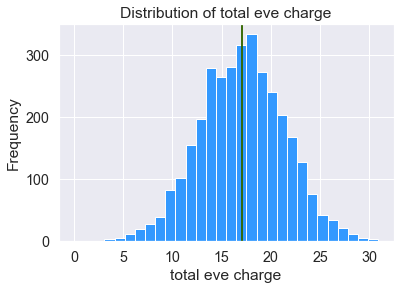

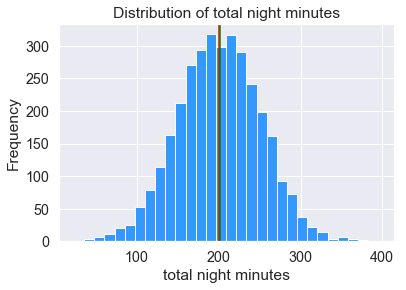

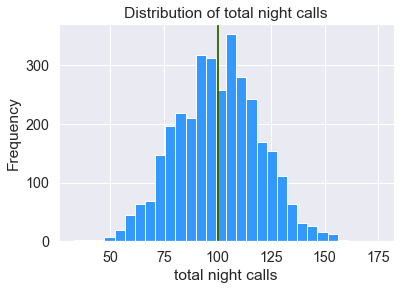

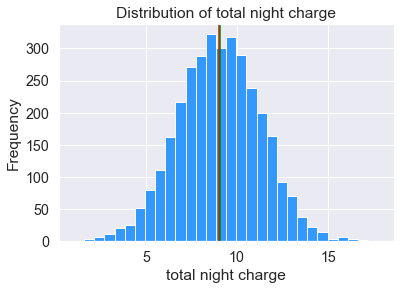

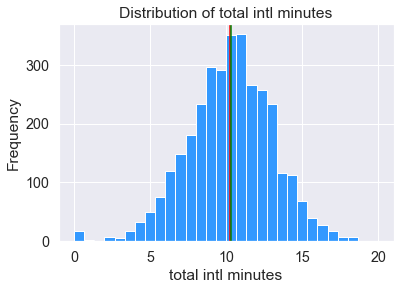

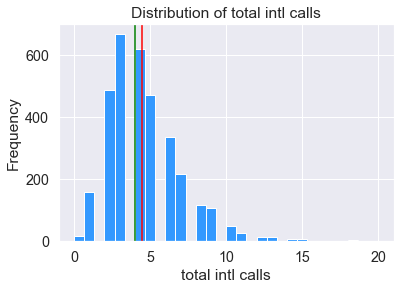

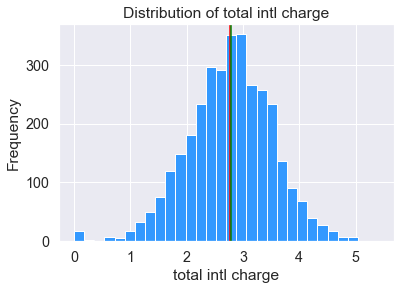

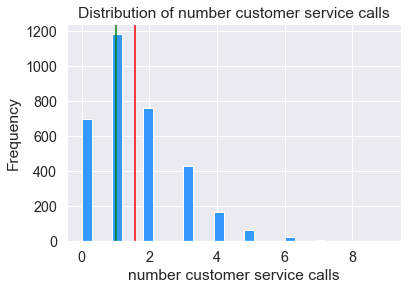

<Figure size 432x288 with 0 Axes>

In [95]:
# Histogram visualization with median and mean for all Continuous Variables
cont_names=["account length",
            "number vmail messages",
            "total day minutes", 
            "total day calls", 
            "total day charge",
            "total eve minutes", 
            "total eve calls",
            "total eve charge",
            "total night minutes",
            "total night calls", 
            "total night charge",
            "total intl minutes", 
            "total intl calls", 
            "total intl charge",
            "number customer service calls"]

for i in cont_names:
    plt.hist(data[i], bins= 30, color ='#3399ff')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + i)
    plt.axvline(data[i].mean(), color= 'red')
    plt.axvline(data[i].median(), color = 'green')
    plt.show()
    plt.clf()
    
# For a normal distribution mean, median and mode all lie on same line
# I am plotting histogram along with mean and median
# Mean is in red color and Median and green color

In [ ]:
# Visualizing Count Plot for all categorical variables

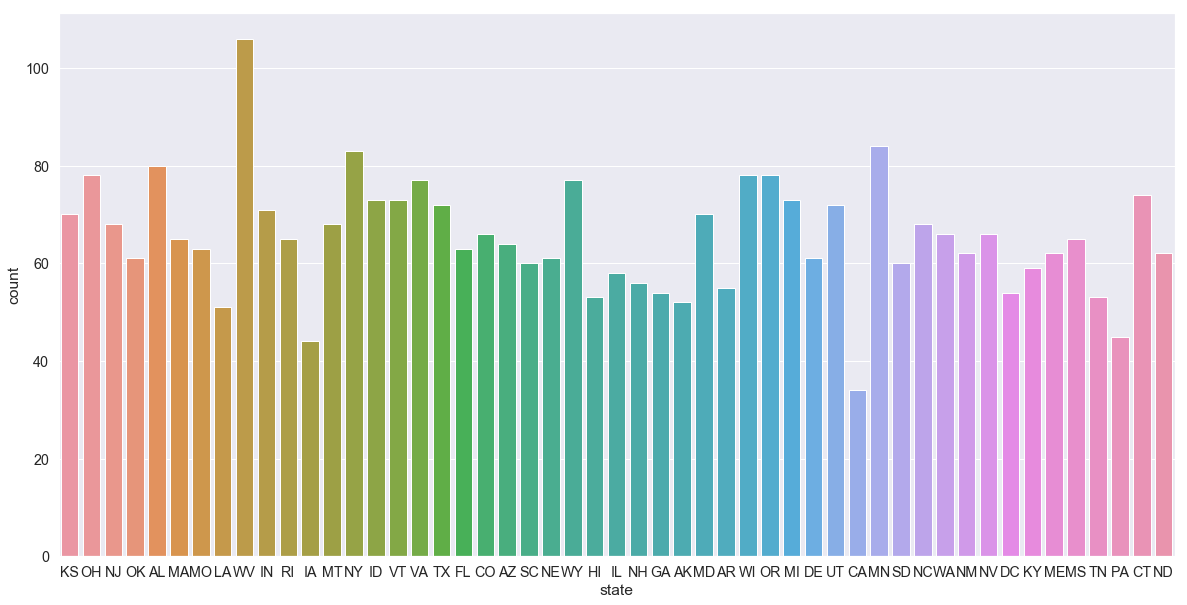

In [96]:
# Count Plot for 'state'
plt.figure( figsize= (20,10) )
sns.countplot(data['state'])

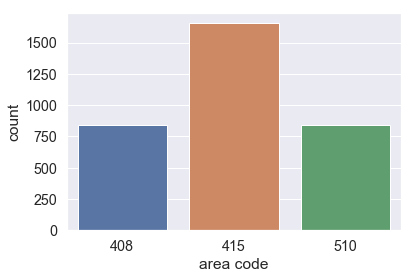

In [97]:
# Count Plot for 'area code'
sns.countplot(data['area code'])

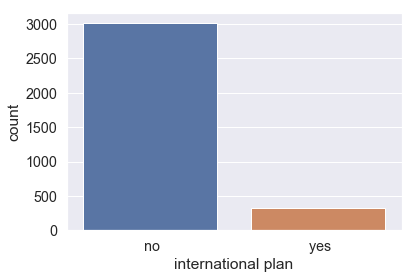

In [98]:
# Count Plot for 'international plan'
sns.countplot(data['international plan'])

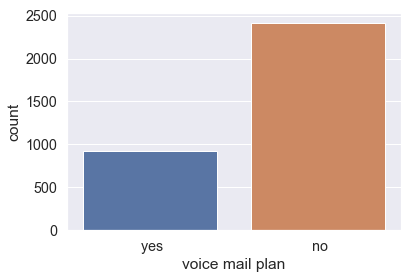

In [99]:
# Count Plot for 'voice mail plan'
sns.countplot(data['voice mail plan'])

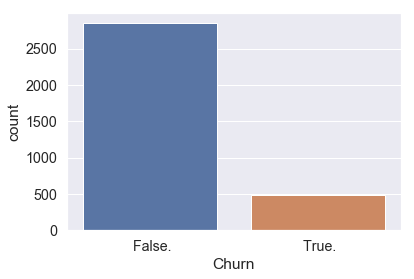

In [100]:
# Count Plot for target variable - 'Churn'
sns.countplot(data['Churn'])

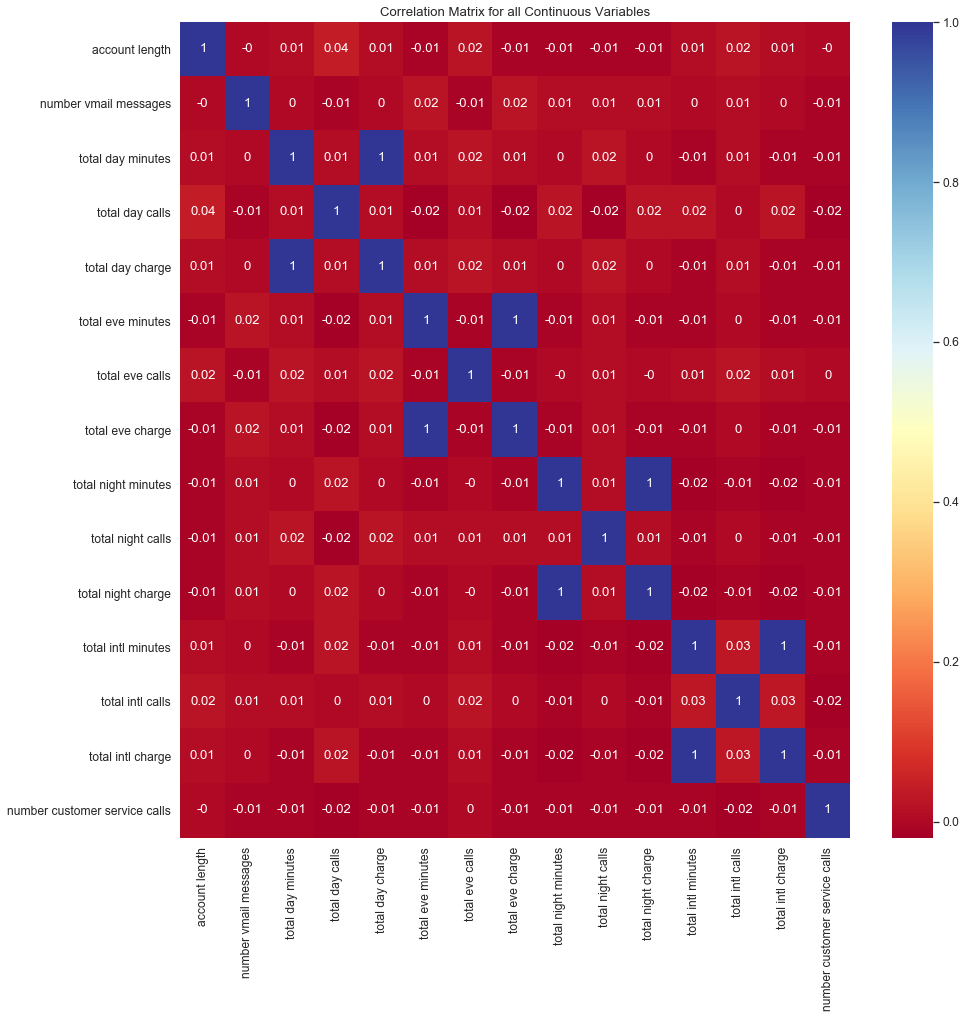

In [101]:
#Correlation Matrix for all continuous variables
continuous_var=data[cont_names] 

corr_matrix=continuous_var.corr()

plt.figure( figsize =(15,15))
sns.set(font_scale=1.1)
plt.title('Correlation Matrix for all Continuous Variables')

sns.heatmap(corr_matrix.round(2), 
            xticklabels=corr_matrix.columns, 
            yticklabels=corr_matrix.columns, 
            cmap ='RdYlBu',
            annot=True,
           )

In [102]:
# After analysing the Correlation Matrix we can see that many predictor variables are related to each other. 
# The following predictor variables have correlation=1 :
# 1. 'total day minutes' and 'total day charge'
# 2. 'total eve minutes' and 'total eve charge'
# 3. 'total night minutes' and 'total night charge'
# 4. 'total intl minutes' and 'total intl charge'

# Hence, I will remove them from my dataset and not consider them for model making

del data['total day charge']
del data['total eve charge']
del data['total night charge']
del data['total intl charge']

In [103]:
# Chi-squared test for all categorical variables and 'Churn'

cat_names= ["state",
            "area code",
            "international plan",
            "voice mail plan",
            ]

for i in cat_names :
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(  data[i], data['Churn']  ))
    print("Chi-squared test for Churn and", i)
    print("The chi2 value =", chi2)
    print("The p value =", p)
    print("The dof =", dof)
    print("        ")

Chi-squared test for Churn and state
The chi2 value = 83.04379191019663
The p value = 0.002296221552011188
The dof = 50
        
Chi-squared test for Churn and area code
The chi2 value = 0.17754069117425395
The p value = 0.9150556960243712
The dof = 2
        
Chi-squared test for Churn and international plan
The chi2 value = 222.5657566499376
The p value = 2.4931077033159556e-50
The dof = 1
        
Chi-squared test for Churn and voice mail plan
The chi2 value = 34.13166001075673
The p value = 5.15063965903898e-09
The dof = 1
        


In [104]:
# After Chi-squared test we can see that the 'p-value' for 'Churn' and all variables except 'area code' is greater than 0.05
# Hence 'area code' is not statistically significant 
# I will remove it from my dataset and not consider it for model making

del data['area code']

In [105]:
# Also deleting 'phone number' as it is just a reference variable with no real information for prediction
del data['phone number']

In [78]:
# Now getting the VIF values for all variables to detect multi-collinearity

# To get VIF values, first I have to encode all categorical variables  

In [106]:
# Creating a dcitionary to replace values of 'state' with numeric value

State = { 
'WV' :     1,  
'MN' :     2,
"NY" :     3,
"AL" :     4,
'WI' :     5,
'OH' :     6,
'OR' :     7,
'VA' :     8,
'WY' :     9,
'CT' :     10,
'ID' :     11,
'VT' :     12,
'MI' :     13,
'TX' :     14,
'UT' :     15, 
'IN' :     16,
'KS' :     17,
'MD' :     18,
'NC' :     19,
'NJ' :     20, 
'MT' :     21,
'CO' :     22,
'NV' :     23,
'WA' :     24,
'MS' :     25,
'RI' :     26,
'MA' :     27,
'AZ' :     28,
'MO' :     29,
'FL' :     30,
'ND' :     31,
'NM' :     32,
'ME' :     33,
'NE' :     34,
'DE' :     35,
'OK' :     36,
'SC' :     37,
'SD' :     38,
'KY' :     40,
'IL' :     41,
'NH' :     42,
'AR' :     43,
'GA' :     44,
'DC' :     45,
'HI' :     46,
'TN' :     47,
'AK' :     48,
'LA' :     49,
'PA' :     50,
'IA' :     51,
'CA' :     52}

In [107]:
# Creating a dcitionary to replace values of 'international plan' with numeric value

international_plan = { ' no' : 0,
                       ' yes' : 1}

In [108]:
# Creating a dcitionary to replace values of 'voice mail plan' with numeric value

voice_mail_plan = { ' no' : 0,
                    ' yes' : 1}

In [110]:
# Creating a dcitionary to replace values of 'Churn' with numeric value

Churn = { ' False.' : 0,
          ' True.'  : 1}

In [111]:
# Replacing values of categorical variables with numerical values

#Replacing values of 'state'
data['state']= data['state'].map(State)

#Replacing values of 'international plan'
data['international plan']= data['international plan'].map(international_plan)

#Replacing values of 'voice mail plan'
data['voice mail plan']= data['voice mail plan'].map(voice_mail_plan)

#Replacing values of 'Churn'
data['Churn']= data['Churn'].map(Churn)

In [112]:
# Checking that the dataset only has numerical values
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,17,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,6,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,20,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,6,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,36,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [113]:
# Now getting the VIF values for all variables
X = sm.add_constant(data)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,148.4,const
1,1.0,state
2,1.0,account length
3,1.1,international plan
4,11.9,voice mail plan
5,11.9,number vmail messages
6,1.1,total day minutes
7,1.0,total day calls
8,1.0,total eve minutes
9,1.0,total eve calls


In [114]:
# The VIF values above 5 are an indication of presence of multi-collinearity
# So removing 'number vmail messages'

del data['number vmail messages']

In [115]:
# Now getting the VIF values for all variables after removing 'number vmail messages'
X = sm.add_constant(data)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,148.4,const
1,1.0,state
2,1.0,account length
3,1.1,international plan
4,1.0,voice mail plan
5,1.1,total day minutes
6,1.0,total day calls
7,1.0,total eve minutes
8,1.0,total eve calls
9,1.0,total night minutes


In [116]:
# Now all the VIF values are close to 1
# So there is no multi-collinearity among predictor variables

# Hence, the final Varialbes selected for final model are :
# 1. 'state', 
# 2. 'account length', 
# 3. 'international plan',
# 4. 'voice mail plan', 
# 5. 'total day minutes', 
# 6. 'total day calls',
# 7. 'total eve minutes', 
# 8. 'total eve calls', 
# 9. 'total night minutes',
# 10. 'total night calls', 
# 11. 'total intl minutes', 
# 12. 'total intl calls',
# 13. 'number customer service calls', 

In [117]:
# Storing the names of all predictor variables

cnames = [ 'state', 
           'account length', 
           'international plan',
           'voice mail plan', 
           'total day minutes', 
           'total day calls',
           'total eve minutes', 
           'total eve calls', 
           'total night minutes',
           'total night calls', 
           'total intl minutes', 
           'total intl calls',
           'number customer service calls']

In [118]:
# Creating a new dataframe 'train_data' such that :
# It's first column is target variable 'Churn'
# All subsequent columns are predictor variables

train_data=pd.DataFrame(data['Churn'])
train_data=train_data.join(data[cnames])

In [119]:
# Checking number of columns in 'train_data'
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
Churn                            3333 non-null int64
state                            3333 non-null int64
account length                   3333 non-null int64
international plan               3333 non-null int64
voice mail plan                  3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total intl minutes               3333 non-null float64
total intl calls                 3333 non-null int64
number customer service calls    3333 non-null int64
dtypes: float64(4), int64(10)
memory usage: 364.6 KB


In [120]:
# Subsetting 'train_data' such that : 
# X contains all the predictor variables
# Y contains the target variable

X=train_data.values[:,1:14]
Y=train_data.values[:,0]

In [121]:
#Split train_data for modelling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
###########################    Logistic Regression Model    ########################### 

In [122]:
# Training the Logistic Regression Model
lrmodel=sm.Logit( Y_train, X_train).fit()
lrmodel.summary()

Optimization terminated successfully.
         Current function value: 0.349279
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2499
Model:                          Logit   Df Residuals:                     2486
Method:                           MLE   Df Model:                           12
Date:                Wed, 22 May 2019   Pseudo R-squ.:                  0.1600
Time:                        20:13:07   Log-Likelihood:                -872.85
converged:                       True   LL-Null:                       -1039.1
                                        LLR p-value:                 6.771e-64
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0072      0.004     -1.722      0.085      -0.015       0.001
x2            -0.0015      0.002     -0.975      0.330      -0.004       0.001
x3             1.9775      0.163     12.129      0.000       1.658       2.297
x4            -0.9146      0.161     -5.672      0.000      -1.231      -0.599
x5             0.0085      0.001      7.650      0.000       0.006       0.011
x6            -0.0102      0.003     -3.663      0.000      -0.016      -0.005
x7             0.0018      0.001      1.594      0.111      -0.000       0.004
x8            -0.0122      0.003     -4.260      0.000      -0.018      -0.007
x9            -0.0004      0.001     -0.372      0.710      -0.003       0.002
x10           -0.0133      0.003     -4.542      0.000      -0.019      -0.008
x11           -0.0115      0.021     -0.536      0.592      -0.054       0.031
x12           -0.1286      0.028     -4.540      0.000      -0.184      -0.073
x13            0.4420      0.042     10.425      0.000       0.359       0.525
==============================================================================
"""

In [123]:
# Making predictions for Logistic Regression Model
pred_lr=lrmodel.predict(X_test)

E:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


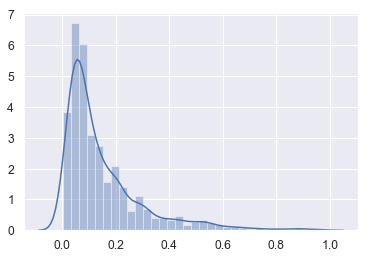

In [124]:
sns.distplot(pred_lr)

In [125]:
# Getting the value of median of pred_lr
np.percentile( pred_lr, 75)

0.1959260222877276

In [126]:
# Setting the  threshold of Logistic Regression Model as 0.1959260222877276
# This means all values greater than 0.1959260222877276 are converted to 1
# And all values lower than 0.1959260222877276 are converted to 0

pred_lr = np.where( pred_lr>= 0.1959260222877276, 1,0 )

In [127]:
#Confusion Matrix for Logistic Regression Model
pd.crosstab(Y_test , pred_lr)

col_0,0,1
row_0,,
0.0,576,140
1.0,49,69


In [128]:
# Area under ROC curve for Logistic Regression Model

fpr, tpr, thre= metrics.roc_curve(Y_test , pred_lr)
auc_lr =  metrics.auc(fpr, tpr)

print ('AUROC : Logistic Regression Model  =', auc_lr)

AUROC : Logistic Regression Model  = 0.6946075182274407


In [ ]:
###########################    Decision Tree Model    ########################### 

In [129]:
# Training the Decision Tree Model
dt_model = tree.DecisionTreeClassifier(criterion='gini').fit(X_train,Y_train) 

In [130]:
# Predictions for Decision Tree Model
pred_dt= dt_model.predict( X_test )

# Confusion Matrix for Decision Tree Model
pd.crosstab(Y_test , pred_dt)

col_0,0.0,1.0
row_0,,
0.0,681,35
1.0,30,88


In [131]:
# Area under ROC curve for Decision Tree Model

fpr, tpr, thre= metrics.roc_curve(Y_test , pred_dt)
auc_dt =  metrics.auc(fpr, tpr)

print ('AUROC : Decision Tree Model =', auc_dt )

AUROC : Decision Tree Model = 0.8484400151500805


In [ ]:
###########################    Random Forest Classifier Model    ########################### 

In [132]:
rf_model = RandomForestClassifier(n_estimators=100)

In [133]:
# Training the Random Forest Classifier Model
rf_model.fit(X_train , Y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
# Making predictions with Random Forest Classifier Model
pred_rf = rf_model.predict(X_test)

# Confusion Matrix for Random Forest Classifier Model
pd.crosstab(Y_test , pred_rf)

col_0,0.0,1.0
row_0,,
0.0,713,3
1.0,34,84


In [135]:
# Area under ROC curve for Random Forest Classifier Model

fpr, tpr, thre= metrics.roc_curve(Y_test , pred_rf)
auc_rf = metrics.auc(fpr, tpr)

print ('AUROC : Random Forest Classifier Model =', auc_rf )

AUROC : Random Forest Classifier Model = 0.8538372313227913


In [136]:
# Getting the Feature Importance

feature_imp = pd.Series(rf_model.feature_importances_, index = data[cnames].columns ).sort_values(ascending=False)
feature_imp

total day minutes                0.252753
number customer service calls    0.126969
total eve minutes                0.100377
total intl minutes               0.070653
international plan               0.070333
total night minutes              0.059891
total intl calls                 0.056107
account length                   0.050023
total day calls                  0.049638
total night calls                0.047860
total eve calls                  0.044705
state                            0.043646
voice mail plan                  0.027045
dtype: float64

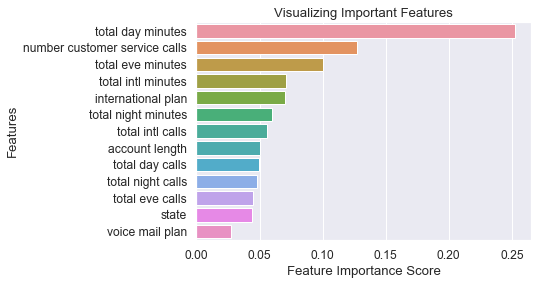

In [137]:
# Visualizing the Feature Importance
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [138]:
# Tuniing Hyperparameters of Random Forest Classifier Model

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200,500],
    'criterion' : ['gini' , 'entropy'],
    'max_features': ['sqrt' ,None,  .5, .7],
    'max_depth':[ 3, 4, 6, None],
    'bootstrap': [True],
    'class_weight' : ['balanced'],
}

In [139]:
# Initialize an instance of RandomForestClassifier
rf_tune = RandomForestClassifier()

In [140]:
# Setting up GridSearch with 3-fold cross validation
rf_tune_model = GridSearchCV(estimator=rf_tune, 
                             param_grid=param_grid,
                             scoring = 'roc_auc',
                             verbose= 5,
                             n_jobs= -1,
                             cv=3,
                            )

In [141]:
# Fitting the tuned model
rf_tune_model.fit ( X_train , Y_train  )

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', None, 0.5, 0.7], 'max_depth': [3, 4, 6, None], 'bootstrap': [True], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

In [142]:
# Getting best parameters after tuning hyperparameters of Random Forest Classifier
rf_tune_model.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 0.5,
 'n_estimators': 500}

In [143]:
# Creating an instance of Random Forest Classifier with best hyperparameters
best_rf = RandomForestClassifier( bootstrap=True,
                                class_weight= 'balanced' ,
                                criterion= 'entropy' ,
                                max_depth= 6 ,
                                max_features= 0.5 ,
                                n_estimators= 500)

In [144]:
# Fitting the model of Random Forest Classifier with best hyperparameters
best_rf.fit ( X_train , Y_train  )

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=6, max_features=0.5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [145]:
# Making predictions with Random Forest Classifier Model after tuning hyperparameters
pred_best_rf = best_rf.predict(X_test)

# Confusion Matrix for Random Forest Classifier Model after tuning hyperparameters
pd.crosstab(Y_test , pred_best_rf)

col_0,0.0,1.0
row_0,,
0.0,698,18
1.0,22,96


In [146]:
# Area under ROC curve for Random Forest Classifier Model after tuning hyperparameters

fpr, tpr, thre= metrics.roc_curve(Y_test , pred_best_rf)
auc_best_rf = metrics.auc(fpr, tpr)

print ('AUROC : Random Forest Classifier Model after tuning hyperparameters =', auc_best_rf)

AUROC : Random Forest Classifier Model after tuning hyperparameters = 0.8942098286147145


In [ ]:
###########################    XGBOOST Classifier Model    ########################### 

In [147]:
xgb_model = XGBClassifier()

In [148]:
# Training the model
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [149]:
# Making predictions with XGBoost Model 
pred_xgb = xgb_model.predict(X_test)

# Confusion Matrix for XGBoost Model 
pd.crosstab(Y_test , pred_xgb)

col_0,0.0,1.0
row_0,,
0.0,708,8
1.0,29,89


In [150]:
# Area under ROC curve for XGBoost Model 

fpr, tpr, thre= metrics.roc_curve(Y_test , pred_xgb)
auc_xgb = metrics.auc(fpr, tpr)

print ('AUROC : XGBoost Model =', auc_xgb)

AUROC : XGBoost Model = 0.8715320518890257


In [ ]:
# Tuning the hyperparameters of XGBoost Classifier Model

In [151]:
xgb = XGBClassifier()

In [154]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
                       'n_estimators' : [100, 500, 1000, 1500],
                       'max_depth'    : [2, 3, 4, 5 , 6] ,
                      }

# Set up the Random Search with 5-fold cross validation to find best hyperparameters
xgb_tune_model = GridSearchCV( estimator=xgb,
                               param_grid=hyperparameter_grid,
                               cv=5, 
                               n_jobs = -1,
                               verbose = 5, 
                               scoring = 'roc_auc',)

In [155]:
# Training the model for best hyperparameters
xgb_tune_model.fit( X_train, Y_train )

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000, 1500], 'max_depth': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

In [156]:
# Getting the best parameters of XGBoost
xgb_tune_model.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [157]:
# Creating a new instance of XGBoost model with best hyperparameters
xgb_best = XGBClassifier( max_depth = 4, n_estimators = 100)

In [158]:
# Training the XGBoost model with best hyperparameters
xgb_best.fit( X_train, Y_train  )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [159]:
# Making predictions with XGBoost model best hyperparameters
pred_xgb_best = xgb_best.predict( X_test)

# Confusion Matrix for XGBoost model best hyperparameters
pd.crosstab(Y_test , pred_xgb_best)

col_0,0.0,1.0
row_0,,
0.0,706,10
1.0,30,88


In [160]:
# Area under ROC curve for XGBoost model best hyperparameters

fpr, tpr, thre= metrics.roc_curve(Y_test , pred_xgb_best)
auc_xgb_best = metrics.auc(fpr, tpr)

print ('AUROC : XGBoost model best hyperparameters =', auc_xgb_best)

AUROC : XGBoost model best hyperparameters = 0.8658981157087396


In [161]:
# Visualizing AUROC values for all models deployed 

# Storing names of all model used
model_name = [ 'Logistic Regression' ,
               'Decision Tree',
               'Random Forest' ,
               'Random Forest after tuning',
               'XGBoost',
               'XGBoost after tuning']

# Storing AUROC values of all model used
auc_value = [    auc_lr.round(3),
                 auc_dt.round(3) ,
                 auc_rf.round(3) ,
                 auc_best_rf.round(3) ,
                 auc_xgb.round(3) ,
                 auc_xgb_best.round(3) ]

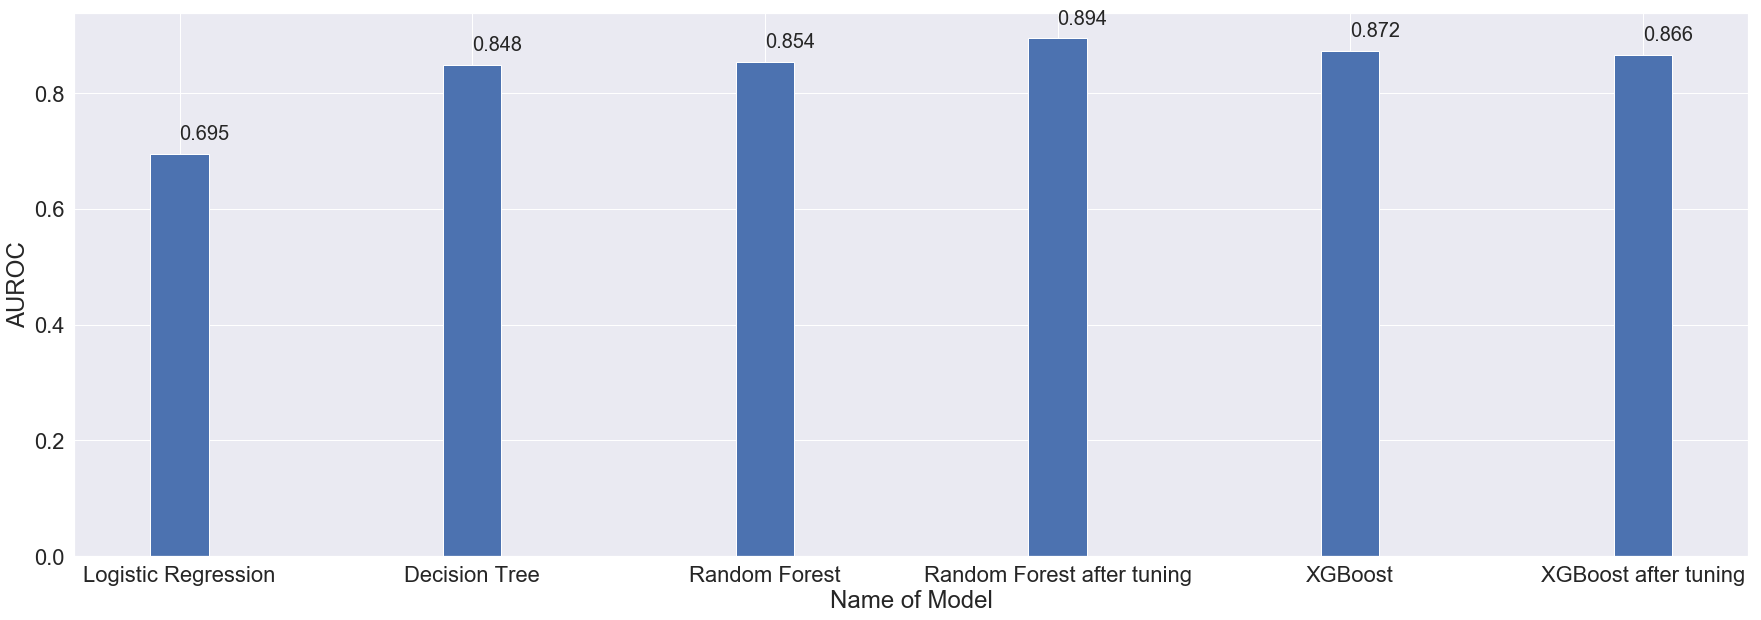

In [162]:
# Visualizing AUROC values for all models deployed 

plt.figure ( figsize= (30,10))

sns.set(font_scale = 2)

#Setting x-axis and y-axis lables
plt.xlabel( 'Name of Model')
plt.ylabel('AUROC')
 
# Setting the position of each barplots on the x-axis 
pos = [ 0 ,4 , 8 , 12 , 16, 20 ]

# Plotting the bars on their position 'pos'
plt.bar( pos , auc_value )
    
# Plotting names of models on the x-axis
plt.xticks( pos , model_name )

# Getting the AUROC value above bars
for index,data in enumerate(auc_value):
    plt.text(x= index*4 , y = data +.025 , s=f"{data}" , fontdict=dict(fontsize=20) )
    
# Show graphic
plt.show()

In [ ]:
# By analysing the above barplot we can see that the highest value for AUROC is for Random Forest after tuning
# Hence I will use that model for predictions on test dataset

In [ ]:
###########################    Making Predictions on Test Dataset    ########################### 

In [163]:
# Load test dataset
test = pd.read_csv( 'Test_data.csv' , sep=',' )

In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 21 columns):
state                            1667 non-null object
account length                   1667 non-null int64
area code                        1667 non-null int64
phone number                     1667 non-null object
international plan               1667 non-null object
voice mail plan                  1667 non-null object
number vmail messages            1667 non-null int64
total day minutes                1667 non-null float64
total day calls                  1667 non-null int64
total day charge                 1667 non-null float64
total eve minutes                1667 non-null float64
total eve calls                  1667 non-null int64
total eve charge                 1667 non-null float64
total night minutes              1667 non-null float64
total night calls                1667 non-null int64
total night charge               1667 non-null float64
total intl minutes           

In [165]:
#Check missing values
test.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [ ]:
# Test dataset has the values for predictor variable 'Churn'
# There are no missing values in Test Dataset
# The test dataset has a lot of variables which are not used for model making
# I will take only relevant predictor variables after transforming the test dataset 

In [166]:
# Transforming the Test dataset 
# Replacing values of categorical variables with numerical values

#Replacing values of 'state'
test['state']= test['state'].map(State)

#Replacing values of 'international plan'
test['international plan']= test['international plan'].map(international_plan)

#Replacing values of 'voice mail plan'
test['voice mail plan']= test['voice mail plan'].map(voice_mail_plan)

#Replacing values of 'Churn'
test['Churn']= test['Churn'].map(Churn)

In [167]:
test.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,46,101,510,354-8815,0,0,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,21,137,510,381-7211,0,0,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,6,103,408,411-9481,0,1,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,32,99,415,418-9100,0,0,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,37,108,415,413-3643,0,0,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [168]:
# Creating a new dataframe 'test_data' such that :
# It's first column is target variable 'Churn' of test dataset
# All subsequent columns are predictor variables selected for model making

test_data=pd.DataFrame(test['Churn'])
test_data=test_data.join(test[cnames])

In [169]:
# Checking the new test_data 
test_data.head()

,Churn,state,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls
0,0,46,101,0,0,70.9,123,211.9,73,236.0,73,10.6,3,3
1,0,21,137,0,0,223.6,86,244.8,139,94.2,81,9.5,7,0
2,0,6,103,0,1,294.7,95,237.3,105,300.3,127,13.7,6,1
3,0,32,99,0,0,216.8,123,126.4,88,220.6,82,15.7,2,1
4,0,37,108,0,0,197.4,78,124.0,101,204.5,107,7.7,4,2


In [170]:
# Making predictions with Random Forest Classifier Model after tuning hyperparameters
test_data['Predicted Churn'] = best_rf.predict(test_data.iloc[:,1:14])

# Confusion Matrix for Random Forest Classifier Model after tuning hyperparameters
pd.crosstab(test_data['Churn'] , test_data['Predicted Churn'])

Predicted Churn,0.0,1.0
Churn,,
0,1418,25
1,48,176


Area Under Curve = 0.8841946341946341


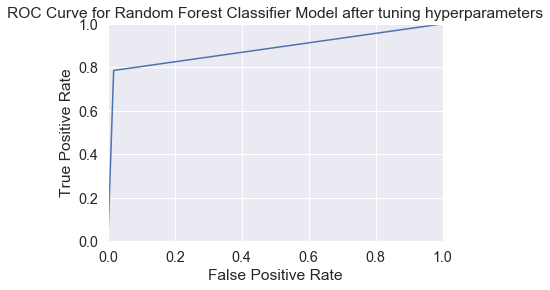

In [171]:
#ROC Curve and AUC value 
sns.set(font_scale = 1.3)
fpr, tpr, thre= metrics.roc_curve(test_data['Churn'], test_data['Predicted Churn'])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Random Forest Classifier Model after tuning hyperparameters')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

area= metrics.auc(fpr, tpr)

print ('Area Under Curve =', area)

In [ ]:
# Deploying Random Forest Classifier Model after tuning hyperparameter on Test Dataset gives AUROC = 0.88